
# Conditional Performance Ratio (CPR) <br> 
#### By Neo Eloff

The **Conditional Performance Ratio (CPR)** is a metric designed to evaluate the performance of an investment strategy that is designed to help diversify an exisiting portfolio. It does this by analyzing across different three different market conditions: drawdowns, bull runs, and normal periods.

## CPR Formula

$$
\text{CPR} = \frac{\mu_{\mathcal{D,d}} + \mu_{\mathcal{B,b}} + \mu_{\mathcal{N}}}{\sigma_{\text{diversifier}}}
$$

Where:

* $ \mu_{\mathcal{D,d}} = \text{Weighted Mean Drawdown} $
* $ \mu_{\mathcal{B,b}} = \text{Weighted Mean Bull Run} $
* $ \mu_{\mathcal{N}} = \text{Mean Normal} $
* $ \sigma_{\text{diversifier}} = \text{Volatility of Diversifier Returns} $

---

**The Weighted Mean Drawdown** $ \mu_{\mathcal{D,d}} $ represents the **weighted average return** of the diversifier during **drawdown periods**—times when the existing portfolio experiences significant declines (e.g., $\geq d\%$ drawdown).
#### Mathematical Representation
$$
\mu_{\mathcal{D,d}} = \frac{\sum_{t \in \mathcal{D}} \left( r_{\text{diversifier}, t} \times w_{\mathcal{D}, t} \right)}{\sum_{t \in \mathcal{D}} w_{\mathcal{D}, t}}
$$

Where:

- $ \mathcal{D} $ = Set of time periods classified as drawdowns.
- $ r_{\text{diversifier}, t} $= Return of the diversifier at time \( t \).
- $w_{\mathcal{D}, t} $ = Weight assigned to the diversifier's return during a drawdown at time \( t \).

#### Weighting Dynamics

The weighting mechanism for drawdowns is designed to **emphasize consecutive periods of deepening drawdowns**. This is achieved through an **exponential weighting scheme**, ensuring that prolonged or severe drawdowns have a more significant impact on the weighted mean.

#### Weight Calculation

**Exponential Weighting Formula:**

$$
w_{\mathcal{D}, t} = \min\left(e^{\lambda_{\mathcal{D}} \times N_t}, w_{\text{max}}\right)
$$

- $ \lambda_{\mathcal{D}} $ = Increment factor for drawdowns (e.g., 0.1).
- $ N_t $ = Number of consecutive periods with **deepening drawdowns** up to time \( t \).
- $ w_{\text{max}} $ = Maximum allowable weight to prevent excessive emphasis.

**Consecutive Deepening Drawdowns (\( N_t \)):**

$$
N_t = 
\begin{cases}
N_{t-1} + 1 & \text{if } \text{Drawdown}_t < \text{Drawdown}_{t-1} \\
1 & \text{otherwise}
\end{cases}
$$

- \( N_t \) increments by **1** for each consecutive period where the current drawdown is **more severe** than the previous one.
- If a period does **not** exhibit a deepening drawdown, \( N_t \) resets to **1**.


### Rationale

- **Emphasis on Severity and Duration:** Consecutive deepening drawdowns indicate worsening market conditions, warranting greater emphasis on the diversifier's performance during these times.
- **Controlled Weight Growth:** The cap ensures that weights remain manageable, preventing a single prolonged drawdown from dominating the metric.

---

The **Weighted Mean Bull Run** $ \mu_{\mathcal{B,b}} $ signifies the **weighted average return** of the diversifier during **bull run periods**—times when the existing portfolio experiences substantial gains (e.g., $\geq b\%$ bull run).

### Mathematical Representation

$$
\mu_{\mathcal{B,b}} = \frac{\sum_{t \in \mathcal{B}} \left( r_{\text{diversifier}, t} \times w_{\mathcal{B}, t} \right)}{\sum_{t \in \mathcal{B}} w_{\mathcal{B}, t}}
$$

Where:

- $ \mathcal{B} $ = Set of time periods classified as bull runs.
- $ r_{\text{diversifier}, t} $ = Return of the diversifier at time \( t \).
- $ w_{\mathcal{B}, t} $ = Weight assigned to the diversifier's return during a bull run at time \( t \).

### Weighting Dynamics

The weighting mechanism for bull runs mirrors that of drawdowns, focusing on **consecutive periods of steepening bull runs** through an **exponential weighting scheme**.

#### Weight Calculation

**Exponential Weighting Formula:**

$$
w_{\mathcal{B}, t} = \min\left(e^{\lambda_{\mathcal{B}} \times M_t}, w_{\text{max}}\right)
$$

- $ \lambda_{\mathcal{B}} $ = Increment factor for bull runs (e.g., 0.1).
- $ M_t $ = Number of consecutive periods with **steepening bull runs** up to time \( t \).
- $ w_{\text{max}} $ = Maximum allowable weight to prevent excessive emphasis.

**Consecutive Steepening Bull Runs (\( M_t \)):**

$$
M_t = 
\begin{cases}
M_{t-1} + 1 & \text{if } \text{Bull Run}_t > \text{Bull Run}_{t-1} \\
1 & \text{otherwise}
\end{cases}
$$

- \( M_t \) increments by **1** for each consecutive period where the current bull run is **steeper** than the previous one.
- If a period does **not** exhibit a steepening bull run, \( M_t \) resets to **1**.

### Rationale

- **Emphasis on Strength and Duration:** Consecutive steepening bull runs signify strengthening market conditions, justifying greater emphasis on the diversifier's performance during these periods.
- **Controlled Weight Growth:** The cap ensures that weights remain reasonable, preventing excessive influence from prolonged bull runs.

---

The **Mean Normal** $ \mu_{\mathcal{N}} $ denotes the **simple average return** of the diversifier during **normal periods**—times when the existing portfolio is neither in a drawdown nor experiencing a bull run.

### Mathematical Representation
$$
\mu_{\mathcal{N}} = \frac{1}{|\mathcal{N}|} \sum_{t \in \mathcal{N}} r_{\text{diversifier}, t}
$$

Where:

- $ \mathcal{N} $ = Set of time periods classified as normal.
- $ |\mathcal{N}| $ = Number of normal periods.
- $ r_{\text{diversifier}, t} $ = Return of the diversifier at time \( t \).

### Weighting Dynamics

Unlike drawdowns and bull runs, **normal periods** utilize a **simple average** without additional weighting. This approach treats all normal periods equally, ensuring that the CPR metric reflects the diversifier's **consistent performance** during stable market conditions.

---

The **Volatility of Diversifier Returns** $ \sigma_{\text{diversifier}} $

### Definition

$\sigma_{\text{diversifier}} $ captures the **volatility** (standard deviation) of the diversifier's returns over the entire evaluation period. It serves as a measure of the diversifier's risk or variability.

### Mathematical Representation

$$
\sigma_{\text{diversifier}} = \sqrt{ \frac{1}{T - 1} \sum_{t=1}^{T} \left( r_{\text{diversifier}, t} - \mu \right)^2 }
$$

Where:

- $ T $ = Total number of periods.
- $ r_{\text{diversifier}, t} $ = Return of the diversifier at time \( t \).
- $ \mu $ = Average diversifier return across all periods.

### Rationale

- **Risk Measurement:** Volatility quantifies the diversifier's return variability, providing context for the weighted means.
- **Normalization:** By dividing the aggregate performance by volatility, CPR adjusts for the diversifier's risk, allowing for a **risk-adjusted performance evaluation**.

---

Notes on the **Handling of Zero Returns**. It is essential to address these zero-return periods to ensure that the CPR metric accurately reflects the strategy's performance. This metric is designed to rank alternative strategies but these strategies are not always required to be on which ulitametely results in monthly returns of 0.00. **Zero returns** may **mask the strategy's true performance** during active periods, leading to **misleading interpretations** of the CPR metric.

#### Impact on CPR Components

* In Drawdown and Bull Run Periods $ \mathcal{D}, \mathcal{B} $ , Zero Returns can **dilute** the **weighted means**, making the strategy appear less effective during critical periods.
* In Normal Periods $ \mathcal{N} $, Zero Returns can affect the **simple mean**, potentially skewing the interpretation of performance during normal times.

#### Recommended Approach: Replace Zero Returns with Base Portfolio Returns

Instead of **dropping** these zero-return periods—which could **bias** your analysis—**replace** them with the **base portfolio's returns**. This approach maintains the **integrity** of the dataset and accounts for the **opportunity cost** of not being active. Diversifying is a choice and there are time 

#### To Replace Zero Returns:

1. **Identify Non-Active Periods:**

$$
\text{Non-Active}_t = 
\begin{cases}
\text{True} & \text{if } r_{\text{diversifier}, t} = 0 \\
\text{False} & \text{otherwise}
\end{cases}
$$

2. **Replace Zero Returns:**

$$
r_{\text{diversifier}, t} = 
\begin{cases}
r_{\text{base}, t} & \text{if } \text{Non-Active}_t = \text{True} \\
r_{\text{diversifier}, t} & \text{otherwise}
\end{cases}
$$

---

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [60]:
def compute_cdr(
    time_series_1,
    time_series_2,
    drawdown_threshold= -0.10,
    bull_run_threshold= 0.10,
    drawdown_increment=0.1,
    bull_run_increment=0.1,
    max_weight=3.0
):
    """
    Computes the Conditional Performance Differential Ratio with Normal Adjustment (CPDR-N).

    Parameters:
    - ports_pctchange (pd.Series): Time series representing portfolio percentage changes.
    - position_returns (pd.Series): Time series representing diversifier (e.g., gold strategy) returns.
    - drawdown_threshold (float): Threshold for drawdown classification (e.g., -0.10 for ≥10% drawdown).
    - bull_run_threshold (float): Threshold for bull run classification (e.g., 0.10 for ≥10% over 12 months).
    - drawdown_increment (float, default=0.1): Increment factor for drawdown weights.
    - bull_run_increment (float, default=0.1): Increment factor for bull run weights.
    - max_weight (float, default=3.0): Maximum allowable weight to cap the exponential growth.

    Returns:
    - for_performance (pd.DataFrame): DataFrame containing returns, cumulative returns, drawdowns, period classifications, weights, and other computed metrics.
    - summary_stats (pd.DataFrame): Summary statistics for diversifier returns across different periods.
    - CDR (float): The Conditional Performance Differential Ratio with Normal Adjustment.
    - volatility_diversifier (float): Volatility of diversifier returns.
    """

    # Create a copy of relevant data
    for_performance = pd.DataFrame({
        'ports_return': time_series_1,
        'diversifier_return': time_series_2
    }).copy()

    # === Handle Zero Returns ===

    # Identify non-active periods
    non_active = for_performance['diversifier_return'] == 0

    # Replace zero returns with base portfolio returns
    for_performance.loc[non_active, 'diversifier_return'] = for_performance.loc[non_active, 'ports_return']

    # === Compute Cumulative Returns ===
    for_performance['ports_cum'] = (1 + for_performance['ports_return']).cumprod()
    for_performance['diversifier_cum'] = (1 + for_performance['diversifier_return']).cumprod()

    # === Calculate Drawdowns for the Base ===
    for_performance['ports_running_max'] = for_performance['ports_cum'].cummax()
    for_performance['ports_drawdown'] = (for_performance['ports_cum'] / for_performance['ports_running_max']) - 1

    # === Identify Drawdown, Bull Run, and Normal Periods ===
    # Identify drawdown periods
    for_performance['in_drawdown'] = for_performance['ports_drawdown'] <= drawdown_threshold

    # Identify bull run periods (≥ bull_run_threshold over 12 months)
    for_performance['ports_rolling_cum_return_12m'] = (
        (1 + for_performance['ports_return'])
        .rolling(window=12, min_periods=12)
        .apply(lambda x: np.prod(x) - 1, raw=True)
    )
    for_performance['in_bull_run'] = for_performance['ports_rolling_cum_return_12m'] >= bull_run_threshold

    # Ensure mutual exclusivity: A period cannot be both in drawdown and bull run
    for_performance['in_bull_run'] = for_performance['in_bull_run'] & (~for_performance['in_drawdown'])

    # Identify normal periods: Not in drawdown or bull run
    for_performance['in_normal'] = ~for_performance['in_drawdown'] & ~for_performance['in_bull_run']

    # === Assign Exponential Weights for Drawdowns and Bull Runs ===
    # Initialize weight columns
    for_performance['drawdown_weight'] = 1.0
    for_performance['bull_run_weight'] = 1.0

    # Initialize counters for consecutive periods
    drawdown_consecutive = 0
    bull_run_consecutive = 0

    # Precompute previous drawdown and previous bull run status
    for_performance['previous_drawdown'] = for_performance['ports_drawdown'].shift(1)
    for_performance['previous_bull_run'] = for_performance['in_bull_run'].shift(1)

    # Iterate through the DataFrame to assign exponential weights
    for idx in for_performance.index:
        # --- Assign Drawdown Weights ---
        if for_performance.at[idx, 'in_drawdown']:
            current_drawdown = for_performance.at[idx, 'ports_drawdown']
            previous_drawdown = for_performance.at[idx, 'previous_drawdown']

            if not np.isnan(previous_drawdown) and current_drawdown < previous_drawdown:
                drawdown_consecutive += 1
            else:
                drawdown_consecutive = 1  # Reset if not deepening

            # Calculate exponential weight
            new_drawdown_weight = np.exp(drawdown_increment * drawdown_consecutive)
            # Cap the weight
            new_drawdown_weight = min(new_drawdown_weight, max_weight)
            # Assign the weight
            for_performance.at[idx, 'drawdown_weight'] = new_drawdown_weight
        else:
            # Reset counter and weight
            drawdown_consecutive = 0
            for_performance.at[idx, 'drawdown_weight'] = 1.0

        # --- Assign Bull Run Weights ---
        if for_performance.at[idx, 'in_bull_run']:
            previous_bull_run = for_performance.at[idx, 'previous_bull_run']

            if previous_bull_run:
                bull_run_consecutive += 1
            else:
                bull_run_consecutive = 1  # Reset if not steepening

            # Calculate exponential weight
            new_bull_run_weight = np.exp(bull_run_increment * bull_run_consecutive)
            # Cap the weight
            new_bull_run_weight = min(new_bull_run_weight, max_weight)
            # Assign the weight
            for_performance.at[idx, 'bull_run_weight'] = new_bull_run_weight
        else:
            # Reset counter and weight
            bull_run_consecutive = 0
            for_performance.at[idx, 'bull_run_weight'] = 1.0

    # Clean up auxiliary columns
    for_performance.drop(['previous_drawdown', 'previous_bull_run'], axis=1, inplace=True)

    # === Compute Weighted Mean Returns ===
    # Compute weighted mean return during drawdowns
    weighted_returns_drawdown = (for_performance['diversifier_return'] * for_performance['drawdown_weight']).sum()
    total_weights_drawdown = for_performance.loc[for_performance['in_drawdown'], 'drawdown_weight'].sum()
    weighted_mean_drawdown = weighted_returns_drawdown / total_weights_drawdown if total_weights_drawdown != 0 else 0

    # Compute weighted mean return during bull runs
    weighted_returns_bull_run = (for_performance['diversifier_return'] * for_performance['bull_run_weight']).sum()
    total_weights_bull_run = for_performance.loc[for_performance['in_bull_run'], 'bull_run_weight'].sum()
    weighted_mean_bull_run = weighted_returns_bull_run / total_weights_bull_run if total_weights_bull_run != 0 else 0

    # Compute simple mean return during normal periods (no weighting)
    mean_normal = for_performance.loc[for_performance['in_normal'], 'diversifier_return'].mean()

    # === Calculate Volatility of Diversifier Returns ===
    volatility_diversifier = for_performance['diversifier_return'].std()

    # === Compute the Conditional Performance Differential Ratio with Normal Adjustment (CPDR-N) ===
    CPR = (weighted_mean_drawdown + weighted_mean_bull_run + mean_normal) / volatility_diversifier if volatility_diversifier != 0 else np.nan

    # === Compute Additional Statistics ===
    def compute_stats(df, condition):
        subset = df.loc[condition, 'diversifier_return']
        count = subset.count()
        positive_returns = subset[subset > 0].count()
        max_return = subset.max()
        min_return = subset.min()
        return {
            'Count': count,
            'Number of Positive Returns': positive_returns,
            'Maximum Return': max_return,
            'Minimum Return': min_return
        }

    # Compute statistics for Drawdown periods
    stats_drawdown = compute_stats(for_performance, for_performance['in_drawdown'])

    # Compute statistics for Bull Run periods
    stats_bull_run = compute_stats(for_performance, for_performance['in_bull_run'])

    # Compute statistics for Normal periods
    stats_normal = compute_stats(for_performance, for_performance['in_normal'])

    # Create a summary DataFrame
    summary_stats = pd.DataFrame({
        'Drawdown (≥10%)': stats_drawdown,
        'Bull Run (≥10% over 12m)': stats_bull_run,
        'Normal Periods': stats_normal
    })

    # === Visualization ===
    fig, ax = plt.subplots(figsize=(14, 7))

    # Plot the diversifier returns
    ax.plot(
        for_performance.index,
        for_performance['diversifier_return'],
        label='Diversifier Returns',
        color='gold',
        linewidth=1
    )

    # Shade drawdown periods
    drawdown = for_performance['in_drawdown']
    for_performance['drawdown_group'] = (drawdown != drawdown.shift()).cumsum()
    drawdown_groups = for_performance[drawdown].groupby('drawdown_group')

    for _, group in drawdown_groups:
        ax.axvspan(group.index.min(), group.index.max(), color='red', alpha=0.1, label='Drawdown (≥10%)')

    # Shade bull run periods
    bull_run = for_performance['in_bull_run']
    for_performance['bull_run_group'] = (bull_run != bull_run.shift()).cumsum()
    bull_run_groups = for_performance[bull_run].groupby('bull_run_group')

    for _, group in bull_run_groups:
        ax.axvspan(group.index.min(), group.index.max(), color='blue', alpha=0.1, label='Bull Run (≥10% over 12m)')

    # Shade normal periods
    normal = for_performance['in_normal']
    for_performance['normal_group'] = (normal != normal.shift()).cumsum()
    normal_groups = for_performance[normal].groupby('normal_group')

    for _, group in normal_groups:
        ax.axvspan(group.index.min(), group.index.max(), color='green', alpha=0.05, label='Normal Periods')

    # To prevent duplicate labels in the legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    # Formatting the plot
    ax.set_title('Diversifier Returns with Market Condition Periods', fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Diversifier Return (%)', fontsize=14)

    # Improve date formatting on the x-axis
    ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Major ticks every 5 years
    ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Minor ticks every year
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)

    # Show grid
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    plt.show()

    # Clean up group columns
    for_performance.drop(['drawdown_group', 'bull_run_group', 'normal_group'], axis=1, inplace=True)

    # === Print Summary ===
    print("\n=== Weighted Mean Diversifier Return ===")
    print(f"During Drawdowns (≥{abs(drawdown_threshold)*100:.0f}%): {weighted_mean_drawdown:.4f}")
    print(f"During Bull Runs (≥{bull_run_threshold*100:.0f}% over 12m): {weighted_mean_bull_run:.4f}")
    print(f"During Normal Periods: {mean_normal:.4f}")

    print(f"\n=== Volatility of Diversifier Returns ===")
    print(f"Volatility: {volatility_diversifier:.4f}")

    print(f"\n=== Conditional Performance Ratio ===")
    print(f"CPR {CPR:.4f}")

    print("\n=== Summary Statistics for Diversifier Returns ===")
    
    # === Return Results ===
    return summary_stats

In [61]:
# Let Us Test This on Gold! 

# Read in the Data
data = pd.read_excel('../equity_bond_gold.xlsx', na_values=['#N/A N/A'], sheet_name='equity_bond_gold_price')

# Rename the specified columns
data = data.rename(columns={
    'LUATTRUU Index': 'Bond',
    'SPXT Index': 'SP500_tr',
    'SPX Index': 'SP500',
    'XAU Curncy': 'Gold'
})

data.head(2)

,Dates,Bond,SP500_tr,SP500,Gold
0,1973-02-01,98.99,NaN,114.76,65.14
1,1973-02-02,98.99,NaN,114.35,65.14


In [62]:
# Resample daily data to monthly frequency
def resample_to_monthly(df):
    """
    Resample daily data to monthly data by taking the last available data point in each month.
    """
    # Ensure 'Dates' is datetime and set as index
    if 'Dates' in df.columns:
        df['Dates'] = pd.to_datetime(df['Dates'])
        df.set_index('Dates', inplace=True)
    else:
        df.index = pd.to_datetime(df.index)
    
    # Resample to monthly data, taking the last available data point in each month
    df_monthly = df.resample('ME').last()
    return df_monthly

In [63]:
def calc_monthly_percent_changes(df, from_daily=False):
    """
    Calculate the percentage change for each column in the DataFrame.
    
    Parameters:
    df : pandas DataFrame - The input DataFrame with monthly price data or daily return data.
    from_daily : bool - If True, calculates cumulative monthly returns from daily data.
                       If False, calculates percentage changes for monthly price data.
    """
    if from_daily:
        # Resample daily return data to get cumulative monthly returns
        df_monthly = (1 + df).resample('ME').prod() - 1  # Monthly cumulative return
    else:
        # Assume monthly price data, calculate the monthly percentage change
        df_monthly = df.pct_change().fillna(0)
    
    # Rename columns to indicate percentage change
    df_monthly.columns = [col + '_pctchange' for col in df_monthly.columns]
    
    return df_monthly

In [64]:
# Lets Get Our Monthly Data
monthly_data = resample_to_monthly(data)

# Get Our Monthly Returns
returns_monthly = calc_monthly_percent_changes(monthly_data)

# Add a weighted 'traditional_port_pctchange' column
returns_monthly['traditional_port_pctchange'] = 0.6 * returns_monthly['SP500_pctchange'] + 0.4 * returns_monthly['Bond_pctchange']

returns_monthly

,Bond_pctchange,SP500_tr_pctchange,SP500_pctchange,Gold_pctchange,traditional_port_pctchange
Dates,,,,,
1973-02-28,0.000000,0.000000,0.000000,0.000000,0.000000
1973-03-31,0.000000,0.000000,-0.001433,0.137062,-0.000860
1973-04-30,0.009420,0.000000,-0.040800,0.072656,-0.020712
1973-05-31,0.002208,0.000000,-0.018884,0.126630,-0.010447
1973-06-30,0.002703,0.000000,-0.006575,0.178109,-0.002863
...,...,...,...,...,...
2024-07-31,0.021879,0.012173,0.011321,0.051939,0.015544
2024-08-31,0.012792,0.024256,0.022835,0.022794,0.018818
2024-09-30,0.012023,0.021357,0.020197,0.052405,0.016927


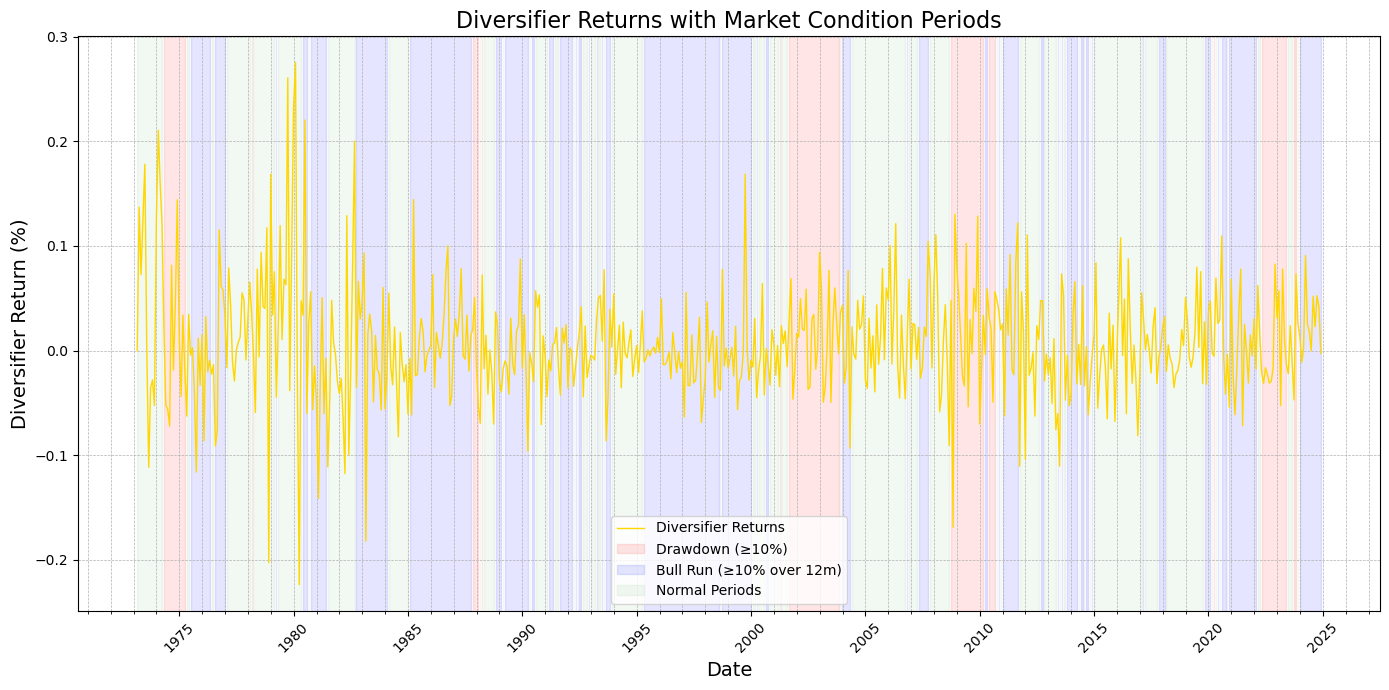


=== Weighted Mean Diversifier Return ===
During Drawdowns (≥10%): 0.0466
During Bull Runs (≥10% over 12m): 0.0100
During Normal Periods: 0.0101

=== Volatility of Diversifier Returns ===
Volatility: 0.0551

=== Conditional Performance Ratio ===
CPR 1.2100

=== Summary Statistics for Diversifier Returns ===


,Drawdown (≥10%),Bull Run (≥10% over 12m),Normal Periods
Count,85.000000,256.000000,281.000000
Number of Positive Returns,48.000000,124.000000,145.000000
Maximum Return,0.144099,0.220355,0.275391
Minimum Return,-0.168896,-0.182182,-0.223705


In [65]:
compute_cdr(returns_monthly['traditional_port_pctchange'],returns_monthly['Gold_pctchange'])

In [66]:
# Read the CSV back into a DataFrame
our_gold_strategy = pd.read_csv('../gold_strategy_combined.csv', index_col=0)  # Specify index_col if index was saved

if not isinstance(our_gold_strategy.index, pd.DatetimeIndex):
    our_gold_strategy.index = pd.to_datetime(our_gold_strategy.index)

our_gold_strategy

,position_returns
Dates,
1973-03-31,0.000000
1973-04-30,0.072656
1973-05-31,0.126630
1973-06-30,0.178109
1973-07-31,0.000416
...,...
2024-07-31,0.051939
2024-08-31,0.022794
2024-09-30,0.052405


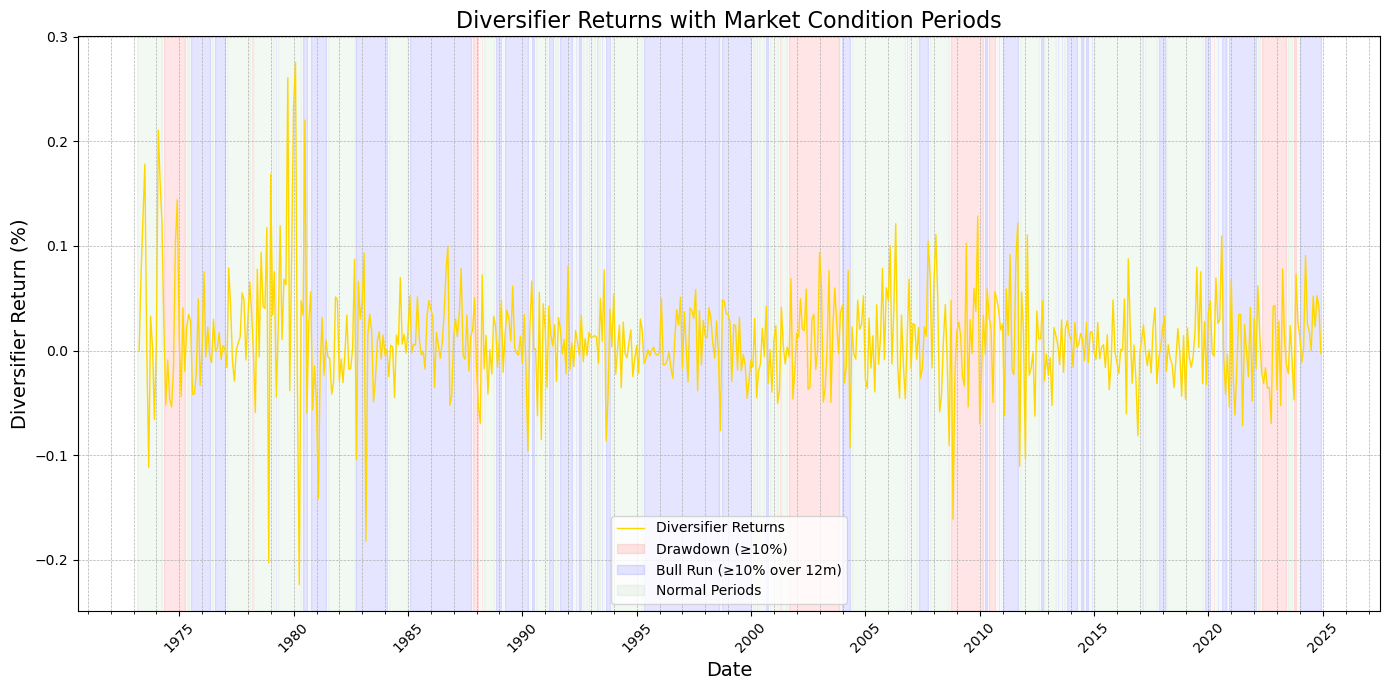


=== Weighted Mean Diversifier Return ===
During Drawdowns (≥10%): 0.0621
During Bull Runs (≥10% over 12m): 0.0167
During Normal Periods: 0.0116

=== Volatility of Diversifier Returns ===
Volatility: 0.0492

=== Conditional Performance Ratio ===
CPR 1.8360

=== Summary Statistics for Diversifier Returns ===


,Drawdown (≥10%),Bull Run (≥10% over 12m),Normal Periods
Count,85.000000,256.000000,280.000000
Number of Positive Returns,45.000000,156.000000,155.000000
Maximum Return,0.144099,0.220355,0.275391
Minimum Return,-0.161261,-0.182182,-0.223705


In [ ]:
#### Our Gold Strategy - Long Gold (Only 63, 252)
compute_cdr(returns_monthly['traditional_port_pctchange'], our_gold_strategy['position_returns'])